# Data Warehousing and Data Mining

## Labs

### Prepared by Gilroy Gordon

#### Contact Information

SCIT ext. 3643

ggordonutech@gmail.com

gilroy.gordon@utech.edu.jm

### Week 6 - Clustering in Python


Additional Reference Resources:

http://scikit-learn.org/stable/modules/clustering.html

Objectives
----
---
     > Data Preprocessing
          > Missing Values (Na and nulls)
     > Data Mining
          > Clustering (Kmeans)
     > Visualizations
          > Elbow method (Within Cluster Sum of Squares)
     > Discussion on how to proceed
    

## Aim: Am I able to segment groups based on 

## Import required libraries and acquire data

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_path = './data/credit-card-data.csv' # Path to data file
data = pd.read_csv(data_path) 
data.head(15)

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000,1164.770591,100.302262,0.000000,12


In [3]:
# What columns are in the data set ? Do they have spaces that I should consider
data.columns

Index(['cust_id', 'balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure'],
      dtype='object')

In [5]:
data.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


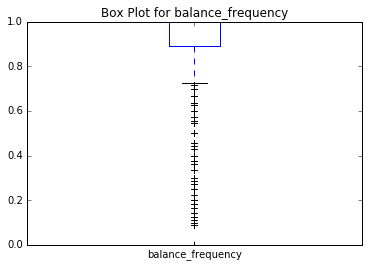

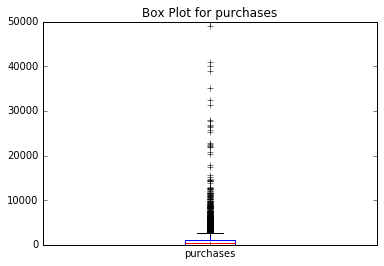

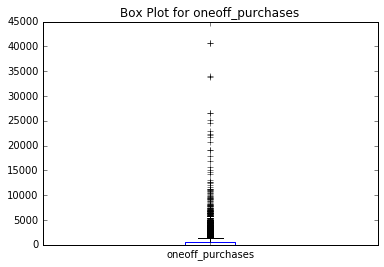

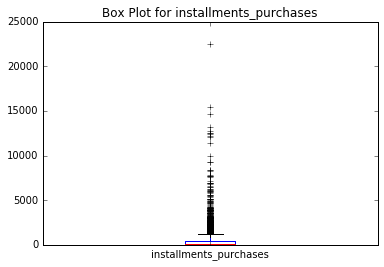

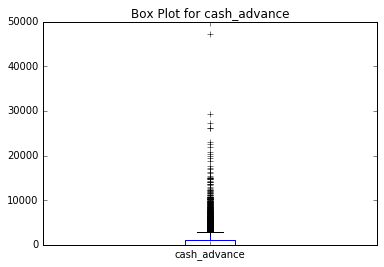

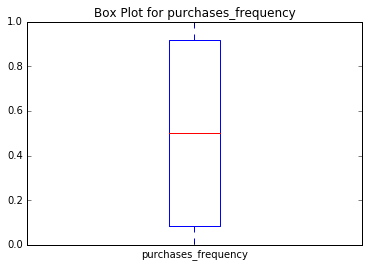

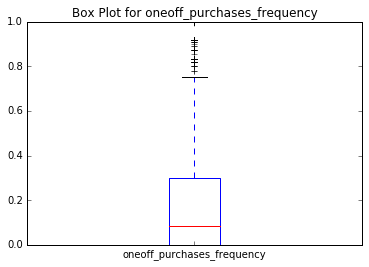

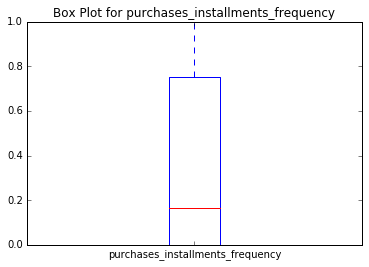

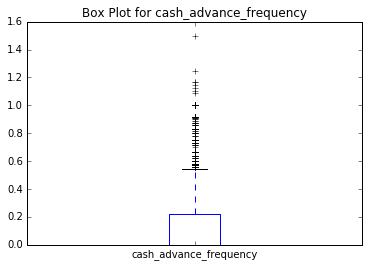

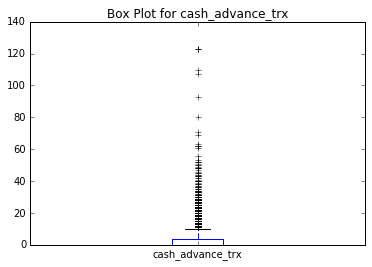

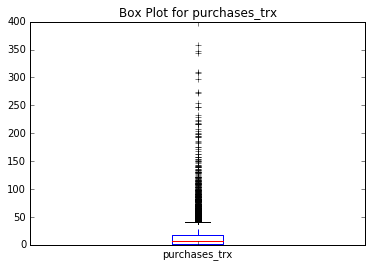

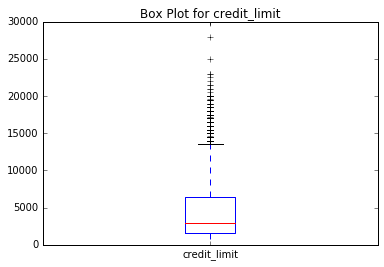

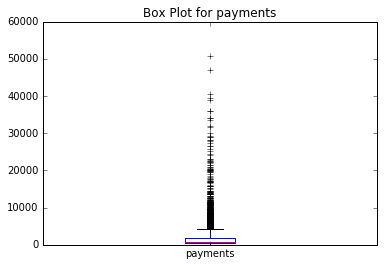

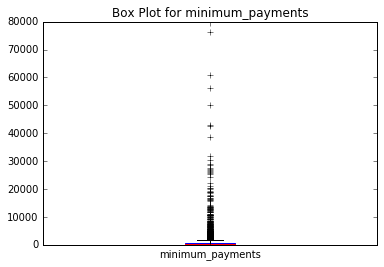

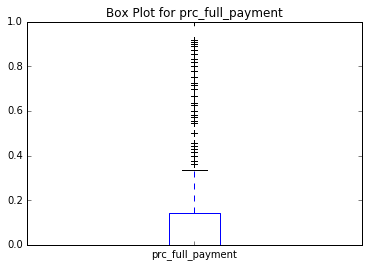

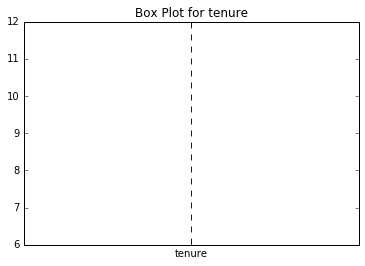

In [6]:
# Let's view the distribution of the data, where is it possible to find groups?
# We are using boxplots of all the columns except the first (cust_id which is a string)
for col in data.columns[2:]:
    data[col].plot(kind='box')
    plt.title('Box Plot for '+col)
    plt.show()


## Aim: Can we identify groups based on purchases and payments?

If that is the case, we could offer different payment plans based on different purchases.



In [7]:
cluster_data = data[['purchases','payments']]
cluster_data.head()

,purchases,payments
0,95.40,201.802084
1,0.00,4103.032597
2,773.17,622.066742
3,1499.00,0.000000
4,16.00,678.334763


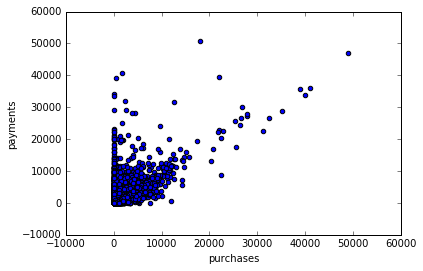

In [8]:
cluster_data.plot(kind='scatter',x='purchases',y='payments')

In [9]:
# Is there any missing data
missing_data_results = cluster_data.isnull().sum()
print(missing_data_results)

# perform imputation with median values
# not require since none missing
#cluster_data = cluster_data.fillna( data.median() )

purchases    0
payments     0
dtype: int64


In [10]:
#retrieve just the values for all columns except customer id
data_values = cluster_data.iloc[ :, 1:].values
data_values

array([[ 201.802084],
       [4103.032597],
       [ 622.066742],
       ...,
       [  81.270775],
       [  52.549959],
       [  63.165404]])

In [11]:
#import KMeans algorithm
from sklearn.cluster import KMeans

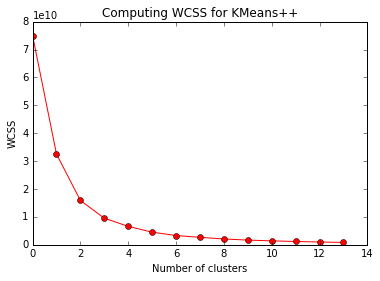

In [12]:
# Use the Elbow method to find a good number of clusters using WCSS (within-cluster sums of squares)
wcss = []
for i in range( 1, 15 ):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict( data_values )
    wcss.append( kmeans.inertia_ )
    
plt.plot( wcss, 'ro-', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

We're seeing an elbow at approx 3, so let's try 3 groups

In [13]:
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300) 
cluster_data["cluster"] = kmeans.fit_predict( data_values )
cluster_data

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,purchases,payments,cluster
0,95.40,201.802084,1
1,0.00,4103.032597,0
2,773.17,622.066742,1
3,1499.00,0.000000,1
4,16.00,678.334763,1
5,1333.28,1400.057770,1
6,7091.01,6354.314328,0
7,436.20,679.065082,1
8,861.49,688.278568,1
9,1281.60,1164.770591,1


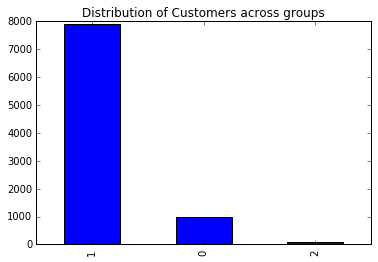

In [24]:
cluster_data['cluster'].value_counts().plot(kind='bar',title='Distribution of Customers across groups')

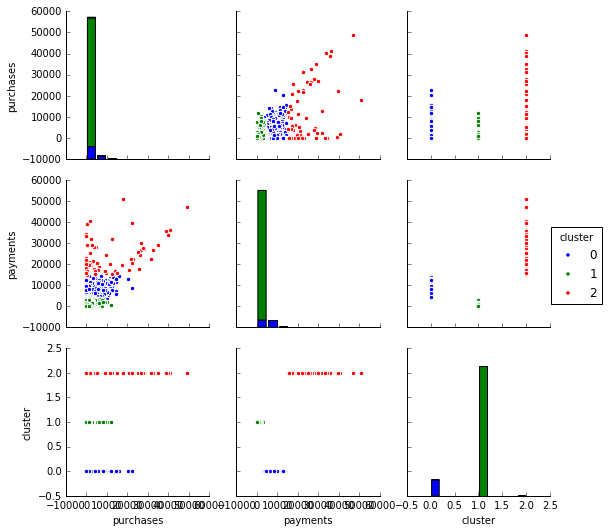

In [15]:
sns.pairplot( cluster_data, hue="cluster")

 Looks nice, but what are we really seeing?
 Let's attempt to describe the groups

In [17]:
grouped_cluster_data = cluster_data.groupby('cluster')
grouped_cluster_data

In [18]:
grouped_cluster_data.describe()

purchases      payments  cluster
cluster                                           
0       count    977.000000    977.000000      977
        mean    2893.507165   6159.668584        0
        std     3248.509337   2505.563838        0
        min        0.000000   3569.182969        0
        25%      147.120000   4201.694496        0
        50%     1771.600000   5359.784024        0
        75%     4587.210000   7443.805810        0
        max    22500.000000  14481.465440        0
1       count   7899.000000   7899.000000     7899
        mean     680.066701    980.439425        1
        std      965.459756    829.030774        0
        min        0.000000      0.000000        1
        25%       35.000000    341.445479        1
        50%      324.000000    708.699641        1
        75%      924.645000   1411.360861        1
        max    11994.710000   3567.009988        1
2       count     74.000000     74.000000       74
        mean   10538.917432  23637.165609        2
        std    12900.044316   7698.746165        0
        min        0.000000  15043.665080        2
        25%       30.000000  17827.712822        2
        50%     3976.770000  20907.273725        2
        75%    21538.785000  27693.619535        2
        max    49039.570000  50721.483360        2

cluster
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
2    Axes(0.125,0.125;0.775x0.775)
dtype: object

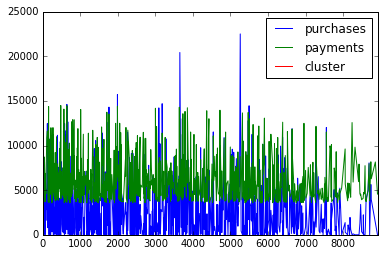

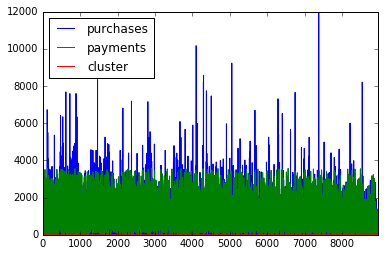

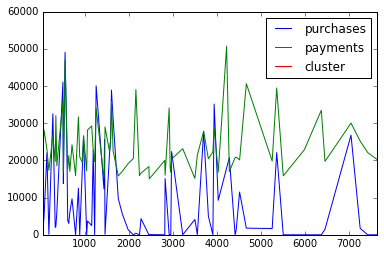

In [20]:
grouped_cluster_data.plot(subplots=True,)

## In - class assignment

1. Provide three(3) plots of the data to assist in describing the initial data set
2. Plot the differences between the groups above using at least two (2) charts.
3. Repeat the clustering activity on different columns in an attempt to provide additional marketing insight. If the results are not insightful state why
